In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set()

MISSING:

(1) Compare histograms with analytical results and peform tests on distribution type


<h3>(1) Generate simulated values from distributions </h3>

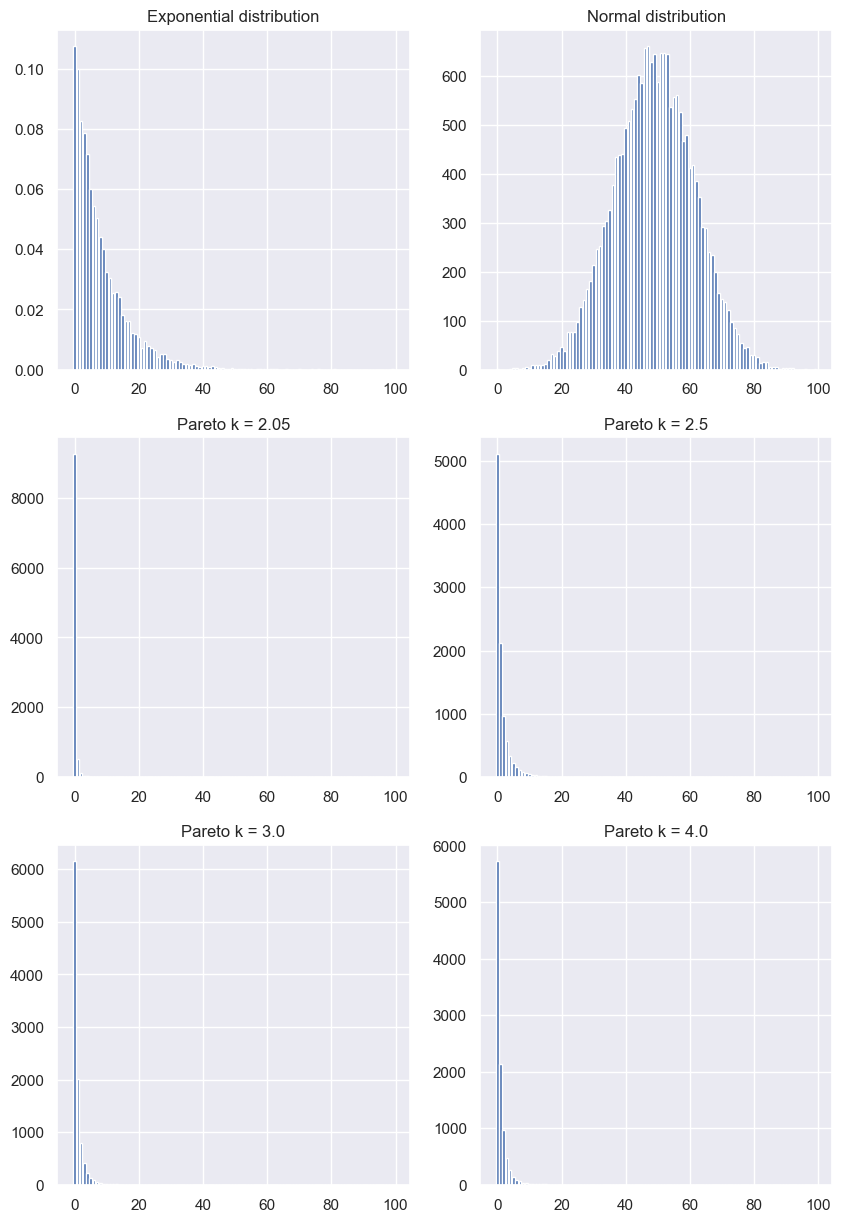

In [19]:
def exponential_distribution(lambda_, n = 10000):
    U = np.random.uniform(0, 1, size = n)
    X = -np.log(U) / lambda_
    return X

def standard_normal_distribution(n = 10000):
    # Using Box-Muller method
    U1 = np.random.uniform(0, 1, size = n)
    U2 = np.random.uniform(0, 1, size = n)

    Z = np.sqrt( -2 * np.log(U1)) * np.stack([np.cos(2 * np.pi * U2), np.sin(2 * np.pi * U2)], axis = 1).T

    return Z[0], Z[1]

def pareto_distribution(beta, k, n = 10000):
    U = np.random.uniform(0, 1, size = n)
    X = beta * U ** (-1/k)

    return X

n_bins = 100
n = 10000

X_exp = exponential_distribution(lambda_ = 10, n = n)
X_exp_hist = np.histogram(X_exp, bins = n_bins)[0] / n

X_norm = standard_normal_distribution(n = n)
X_norm_hist = np.histogram(X_norm, bins = n_bins)[0]

k1 = 2.05
k2 = 2.5
k3 = 3.
k4 = 4.

X_par_1 = pareto_distribution(beta = 1, k = k1, n = n)
X_par_1_hist = np.histogram(X_par_1, bins = n_bins)[0]

X_par_2 = pareto_distribution(beta = 1, k = k2, n = n)
X_par_2_hist = np.histogram(X_par_2, bins = n_bins)[0]

X_par_3 = pareto_distribution(beta = 1, k = k3, n = n)
X_par_3_hist = np.histogram(X_par_3, bins = n_bins)[0]

X_par_4 = pareto_distribution(beta = 1, k = k4, n = n)
X_par_4_hist = np.histogram(X_par_4, bins = n_bins)[0]

fig, ax = plt.subplots(3, 2, figsize = (10, 15))
ax[0, 0].set_title(f'Exponential distribution')
ax[0, 0].bar(np.arange(0, n_bins, 1), height = X_exp_hist)
ax[0, 1].set_title(f'Normal distribution')
ax[0, 1].bar(np.arange(0, n_bins, 1), height = X_norm_hist)
ax[1, 0].set_title(f'Pareto k = {k1}')
ax[1, 0].bar(np.arange(0, n_bins, 1), height = X_par_1_hist)
ax[1, 1].set_title(f'Pareto k = {k2}')
ax[1, 1].bar(np.arange(0, n_bins, 1), height = X_par_2_hist)
ax[2, 0].set_title(f'Pareto k = {k3}')
ax[2, 0].bar(np.arange(0, n_bins, 1), height = X_par_3_hist)
ax[2, 1].set_title(f'Pareto k = {k4}')
ax[2, 1].bar(np.arange(0, n_bins, 1), height = X_par_4_hist)

plt.show()


<h3>(2) Pareto distribution moments </h3>

In [ ]:
X1 = pareto_distribution(beta = 1, k = k1, n = n)
X2 = pareto_distribution(beta = 1, k = k2, n = n)
X3 = pareto_distribution(beta = 1, k = k3, n = n)
X4 = pareto_distribution(beta = 1, k = k4, n = n)

Xs = {
    'k'
}

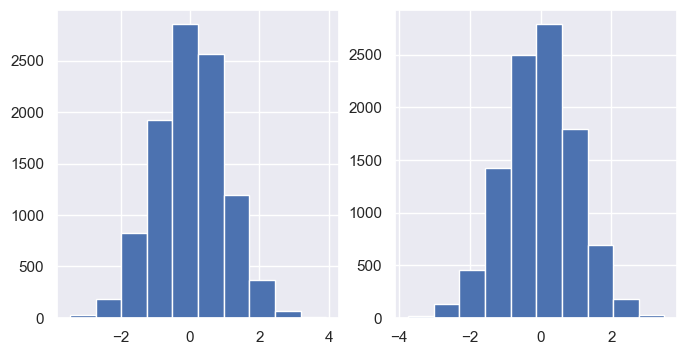

In [21]:
def standard_normal_distribution(n = 10000):
    # Using Box-Muller method
    U1 = np.random.uniform(0, 1, size = n)
    U2 = np.random.uniform(0, 1, size = n)

    #theta = 2 * np.pi * U2
    #r = np.sqrt( -2 * np.log(U1))

    Z = np.sqrt( -2 * np.log(U1)) * np.stack([np.cos(2 * np.pi * U2), np.sin(2 * np.pi * U2)], axis = 1).T

    return Z[0], Z[1]

Z1, Z2 = standard_normal_distribution(10000)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].hist(Z1)
ax[1].hist(Z2)

plt.show()


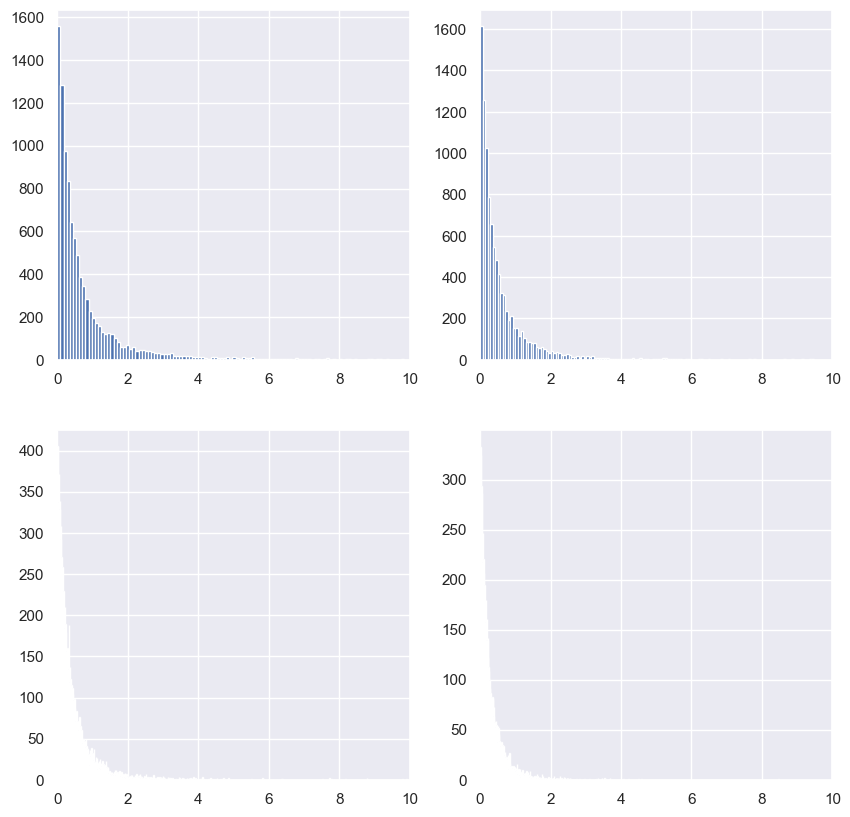

In [81]:
def pareto_distribution(beta = 1, k = 2.05, n = 10000):
    U = np.random.uniform(0, 1, size = n)

    X = beta * (U ** (-1/k) - 1)

    return X

X1 = pareto_distribution(k = 2.05)
X2 = pareto_distribution(k = 2.5)
X3 = pareto_distribution(k = 3)
X4 = pareto_distribution(k = 4)

Xs = [X1, X2, X3, X4]
n_bins = 100

x_range = np.linspace(0, 1, 10)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
axf = ax.flatten()
for i in range(len(axf)):
    axf[i].set_xlim(0, 10)
    axf[i].hist(Xs[i], bins = 1000, color='b')

plt.show()